# EDA and Regression Model on Store Sales Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


1. Importing Required Libraries We are now importing the necessary Python libraries that will help us load, explore, visualize, and model the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
file_path = '/content/Stores.csv'
data = pd.read_csv(file_path)
data.head()


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


3. Dropping Redundant Column. We remove the first column, assuming it's just an index or identifier that we don’t need.

In [7]:
data.drop(data.columns[0], axis=1, inplace=True)

4. Viewing Dataset Info. We take a look at the structure and summary statistics of our dataset to understand data types and distributions.

In [8]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB
None


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


5. Visualizing Missing Data. We plot missing values so we can quickly see if any features need cleaning.

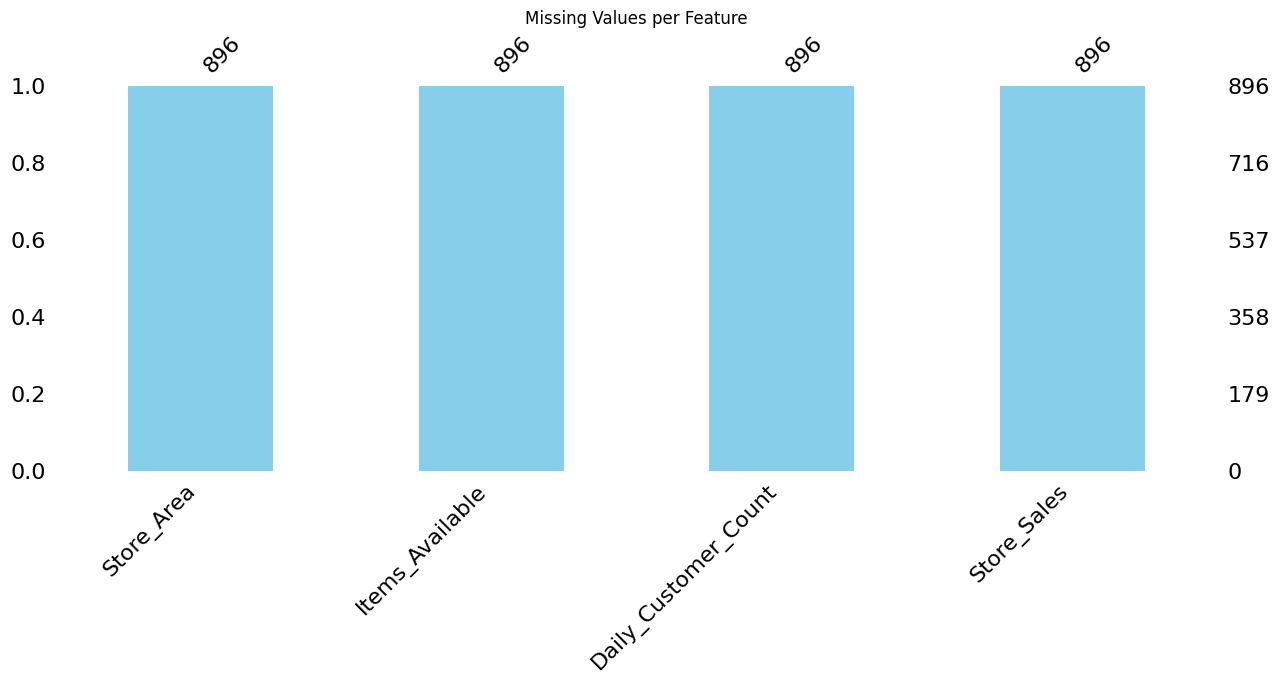

In [9]:
msno.bar(data, figsize=(15, 5), color='skyblue')
plt.title("Missing Values per Feature")
plt.show()

6. Checking Unique Values. We count how many unique entries each feature has. This helps us detect categorical features or features with low variability.

In [10]:
for feature in data.columns:
    unique_vals = data[feature].nunique()
    print(f"Feature '{feature}' has {unique_vals} unique values")

Feature 'Store_Area' has 583 unique values
Feature 'Items_Available' has 616 unique values
Feature 'Daily_Customer_Count' has 130 unique values
Feature 'Store_Sales' has 816 unique values


7. Plotting Feature Distributions. We now visualize each feature to understand its distribution, check skewness, and spot any abnormalities.

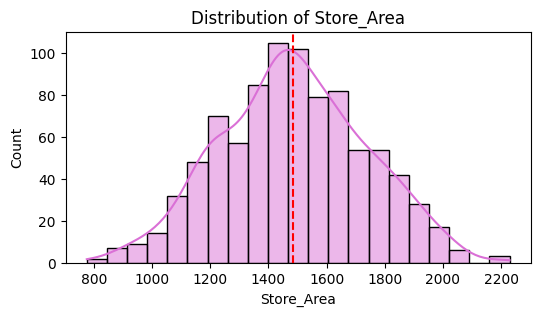

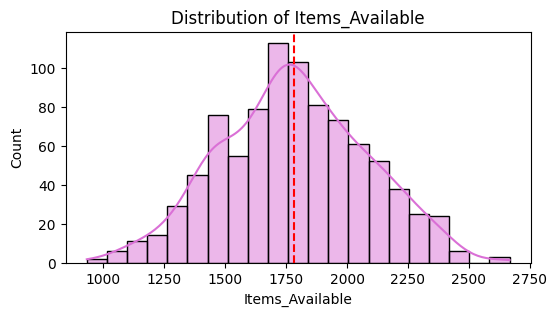

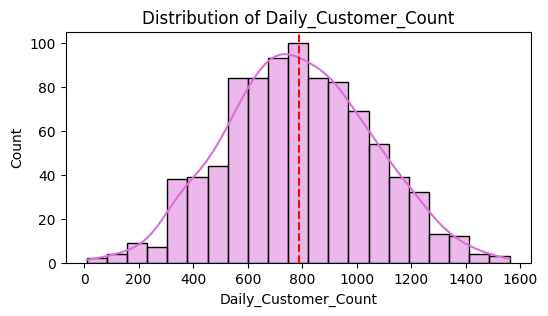

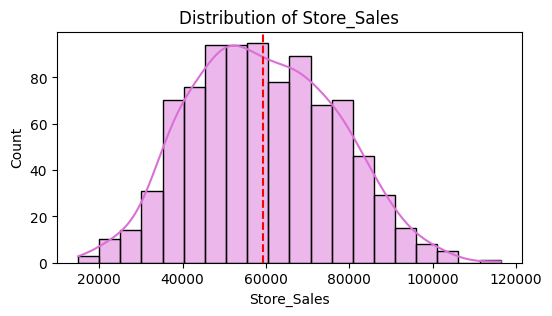

In [11]:
for col in data.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, color='orchid')
    plt.axvline(data[col].mean(), color='red', linestyle='--')
    plt.title(f"Distribution of {col}")
    plt.show()

8. Exploring Feature Relationships. Using pairplots, we explore how features interact with one another. This gives us visual clues on linear or non-linear relationships.

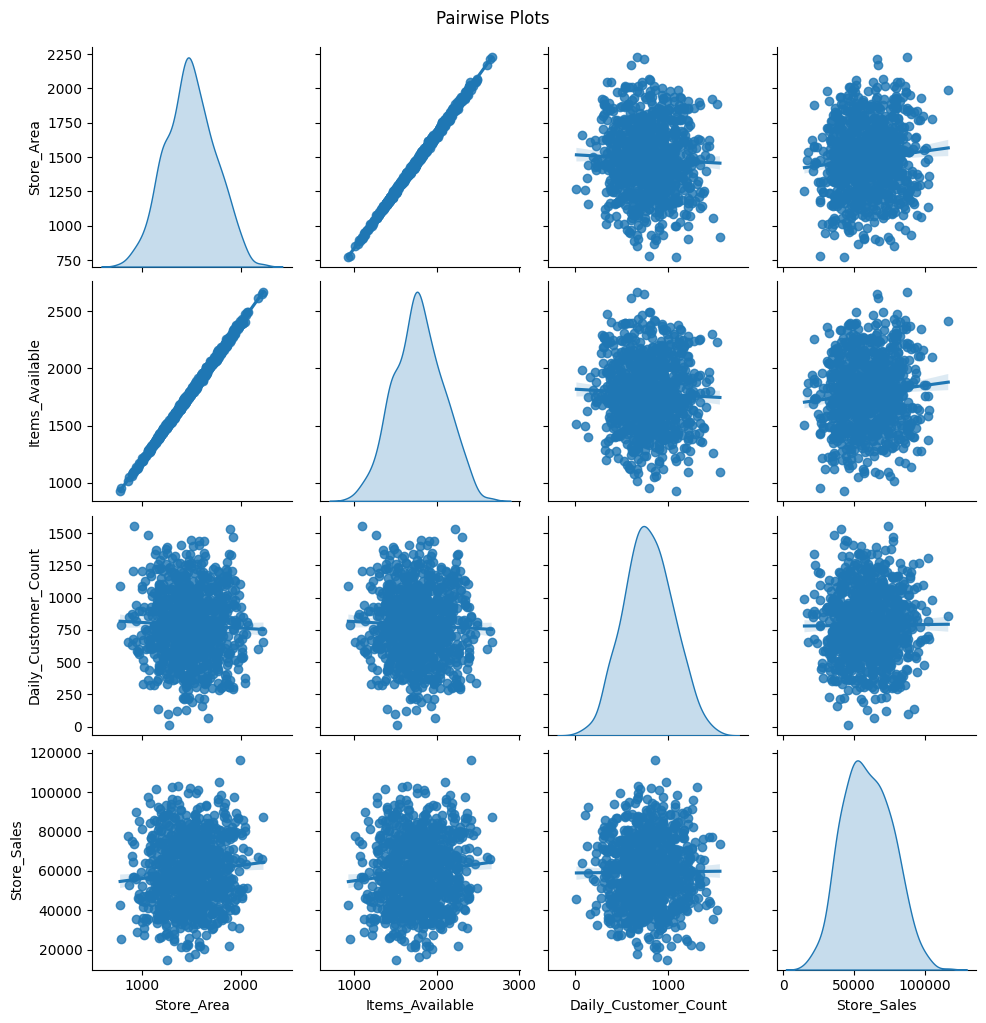

In [12]:
sns.pairplot(data, kind='reg', diag_kind='kde', height=2.5)
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

9. Detecting Outliers with Boxplots. We use boxplots to visually identify outliers in all numeric columns.

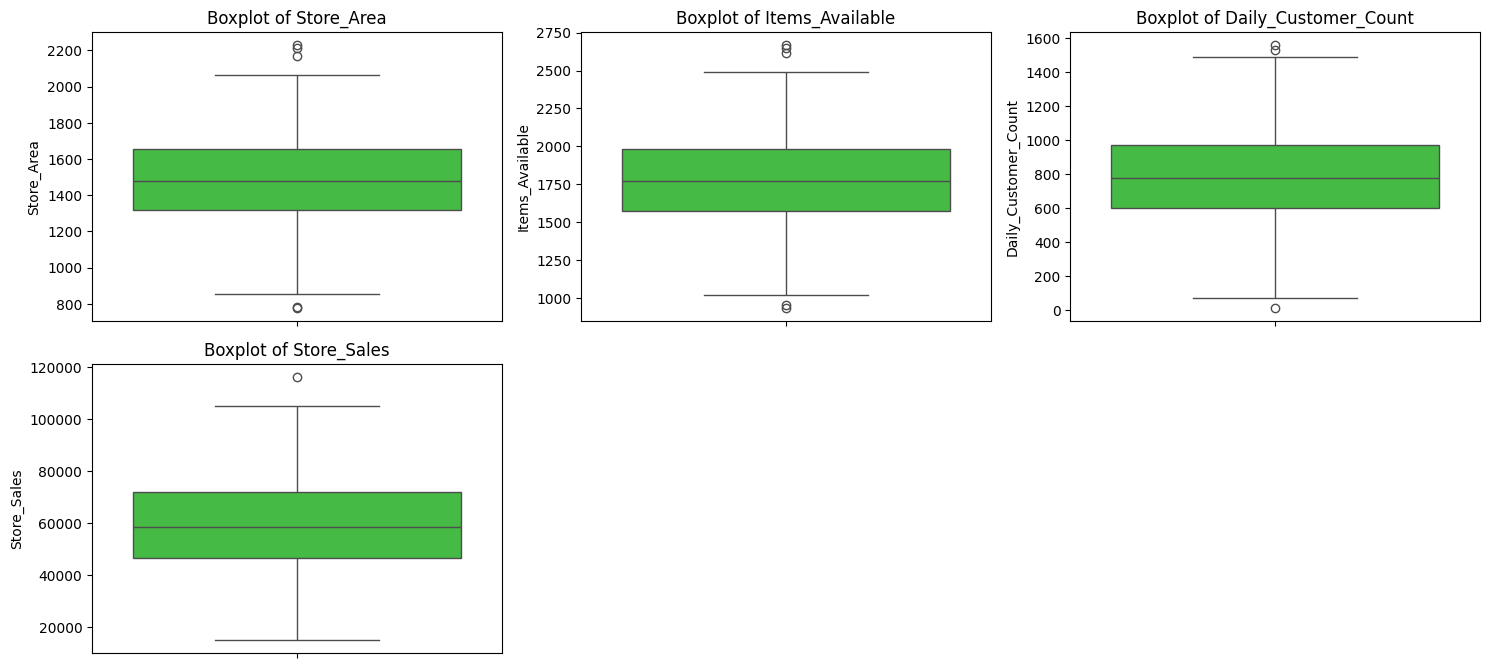

In [13]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(data.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=data[col], color='limegreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

10. Correlation with Store Sales. We check which features are most strongly correlated with our target variable `Store_Sales`.

In [14]:
correlations = data.corr()
print(correlations['Store_Sales'].sort_values(ascending=False))

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64


11. Heatmap of Top Correlated Features. We visualize the top 10 features that have the highest correlation with `Store_Sales`.

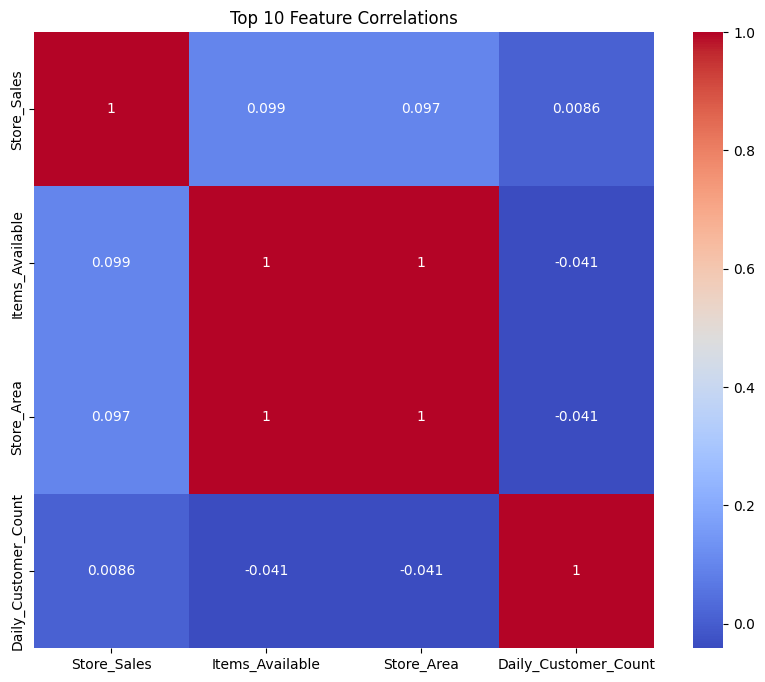

In [15]:
top_features = correlations['Store_Sales'].abs().nlargest(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Feature Correlations")
plt.show()

13. Finding Outliers Using LOF. We use the Local Outlier Factor algorithm to detect unusual data points that may affect model performance.

In [20]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5, contamination='auto')
labels = lof.fit_predict(data)
data['Is_Outlier'] = labels

14. Removing Outliers from Dataset. We separate out the outliers and create a clean dataset to use for training.

In [21]:
outliers = data[data['Is_Outlier'] == -1]
clean_data = data[data['Is_Outlier'] == 1]

15. Preparing Inputs and Target. We define our features (`X`) and the target variable (`y`) from the cleaned dataset.

In [22]:
X = clean_data.drop(['Store_Sales', 'Is_Outlier'], axis=1)
y = clean_data['Store_Sales']

16. Splitting into Train and Test Sets. We split the data into training and testing sets so we can train our models and evaluate them fairly.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

17. Training and Comparing Models. We train several regression models and compare their performance using RMSE and MAE metrics.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

models = [
    RandomForestRegressor(),
    LinearRegression(),
    ElasticNet(),
    KNeighborsRegressor(),
    xgb.XGBRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"  RMSE: {mean_squared_error(y_test, preds):.2f}")
    print(f"  MAE : {mean_absolute_error(y_test, preds):.2f}")
    print("-" * 30)

Model: RandomForestRegressor
  RMSE: 321968351.02
  MAE : 14861.22
------------------------------
Model: LinearRegression
  RMSE: 254003891.85
  MAE : 13228.17
------------------------------
Model: ElasticNet
  RMSE: 254003889.17
  MAE : 13228.17
------------------------------
Model: KNeighborsRegressor
  RMSE: 299733602.93
  MAE : 14503.15
------------------------------
Model: XGBRegressor
  RMSE: 344107232.00
  MAE : 15160.01
------------------------------


# Conclusion

In conclusion, the performance of different regression models provides valuable insights for boosting sales in a retail store. Among the models tested, Linear Regression and ElasticNet demonstrated relatively lower RMSE and MAE values, indicating better accuracy in predicting sales. These models suggest that focusing on product availability, improving service levels, and optimizing store layout could have a significant impact on sales.

While RandomForestRegressor, KNeighborsRegressor, and XGBRegressor showed higher errors, they still offer potential insights into sales trends and could help identify areas for improvement. For instance, RandomForestRegressor could provide useful information for impulse purchase strategies, while XGBRegressor might benefit from further fine-tuning to reduce prediction errors.

To effectively increase sales, it’s crucial to apply strategies based on model insights, such as improving product display for impulse purchases, ensuring stock availability, and offering promotions like volume-based discounts. By leveraging these strategies, you can enhance customer experience and drive both average transaction value and purchase frequency, ultimately boosting overall sales performance.